<a href="https://colab.research.google.com/github/GeetanjaliWadhwa/LGMVIP-DS-DECISION_TREE/blob/main/Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTION USING DECISION TREE ALGORITHM**


TASK 2: INTERMEDIATE LEVEL

by Geetanjali


**TASK: Create the decision tree classifier and visualize it graphically.**

GOAL: If we feed any new data, it would be able to predict the right class accordingly.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
iris=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris .csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.rename(columns={"SepalLengthCm": "Sepal Length", "SepalWidthCm":"Sepal Width","PetalLengthCm":"Petal Length","PetalWidthCm":"Petal Width"},inplace=True)


In [5]:
iris['Species']=iris["Species"].str.split('-',expand=True)[1]
iris.head()

,Id,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.drop("Id", axis=1,inplace=True)
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.shape

(150, 5)

In [8]:
type(iris)

pandas.core.frame.DataFrame

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

**DATA VISUALIZATION**

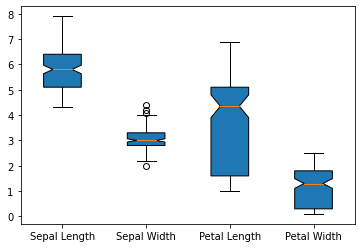

In [12]:
sl=iris['Sepal Length']
sw=iris['Sepal Width']
pl= iris['Petal Length']
pw=iris['Petal Width']

columns=[sl,sw,pl,pw]

fig,ax=plt.subplots()
ax.boxplot(columns,notch=True, patch_artist=True)
plt.xticks([1,2,3,4],['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

In [13]:
iris.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


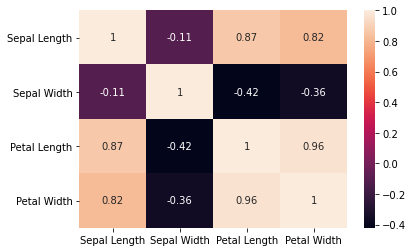

In [14]:
sb.heatmap(iris.corr(),annot=True)

**TRAINING AND TESTING**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=iris.iloc[:,:4]
y=iris.iloc[:,-1]

In [17]:
X.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [19]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=101)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt_classifier= DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)
predicted=dt_classifier.predict(X_test)
expected=y_test


In [22]:
print("Training score: ",dt_classifier.score(X_train, y_train))

Training score:  1.0


In [23]:
data={ 'Actual data Y': expected,'Predicted data Y':predicted}
df=pd.DataFrame(data)
df.reset_index(inplace=True, drop =True)
df.head(10)

,Actual data Y,Predicted data Y
0,setosa,setosa
1,setosa,setosa
2,setosa,setosa
3,virginica,versicolor
4,versicolor,versicolor
5,virginica,virginica
6,versicolor,versicolor
7,versicolor,versicolor
8,virginica,virginica
9,setosa,setosa


In [24]:
print("Testing score: ", dt_classifier.score(X_test,y_test))

Testing score:  0.9555555555555556


In [25]:
dt_classifier.predict([[4.7,3.2,1.3,0.2]])  #testing a value

array(['setosa'], dtype=object)

In [26]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(expected, predicted))

Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.95      0.95        20
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
accuracy= accuracy_score(expected,predicted)
print("Accuracy score: ", accuracy)

Accuracy score:  0.9555555555555556


In [29]:
print(f"Accuracy Percentage: {accuracy*100} %" )

Accuracy Percentage: 95.55555555555556 %


In [30]:
cm= confusion_matrix(expected,predicted)
print("Confusion Matrix: \n",cm)

Confusion Matrix: 
 [[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


In [31]:
matrix= pd.crosstab(df['Actual data Y'],df['Predicted data Y'], rownames=['Actual'], colnames=['Predicted'])
print(matrix)

Predicted   setosa  versicolor  virginica
Actual                                   
setosa          13           0          0
versicolor       0          19          1
virginica        0           1         11


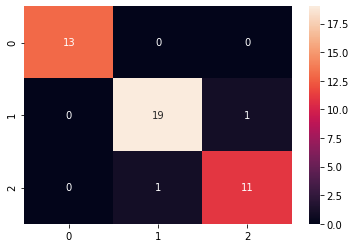

In [32]:
sb.heatmap(cm, annot=True)
plt.show()

**CREATING AND VISUALIZING DECISION TREE CLASSIFIER**

In [33]:
from sklearn import tree

In [34]:
dt_classifier.feature_importances_
#finding importance of each feature

array([0.        , 0.02153993, 0.04099119, 0.93746888])

In [35]:
feature_names=['Sepal Length','Sepal Width', 'Petal Length','Petal Width']
class_names=['setosa','versicolor','virginica']                         
                  

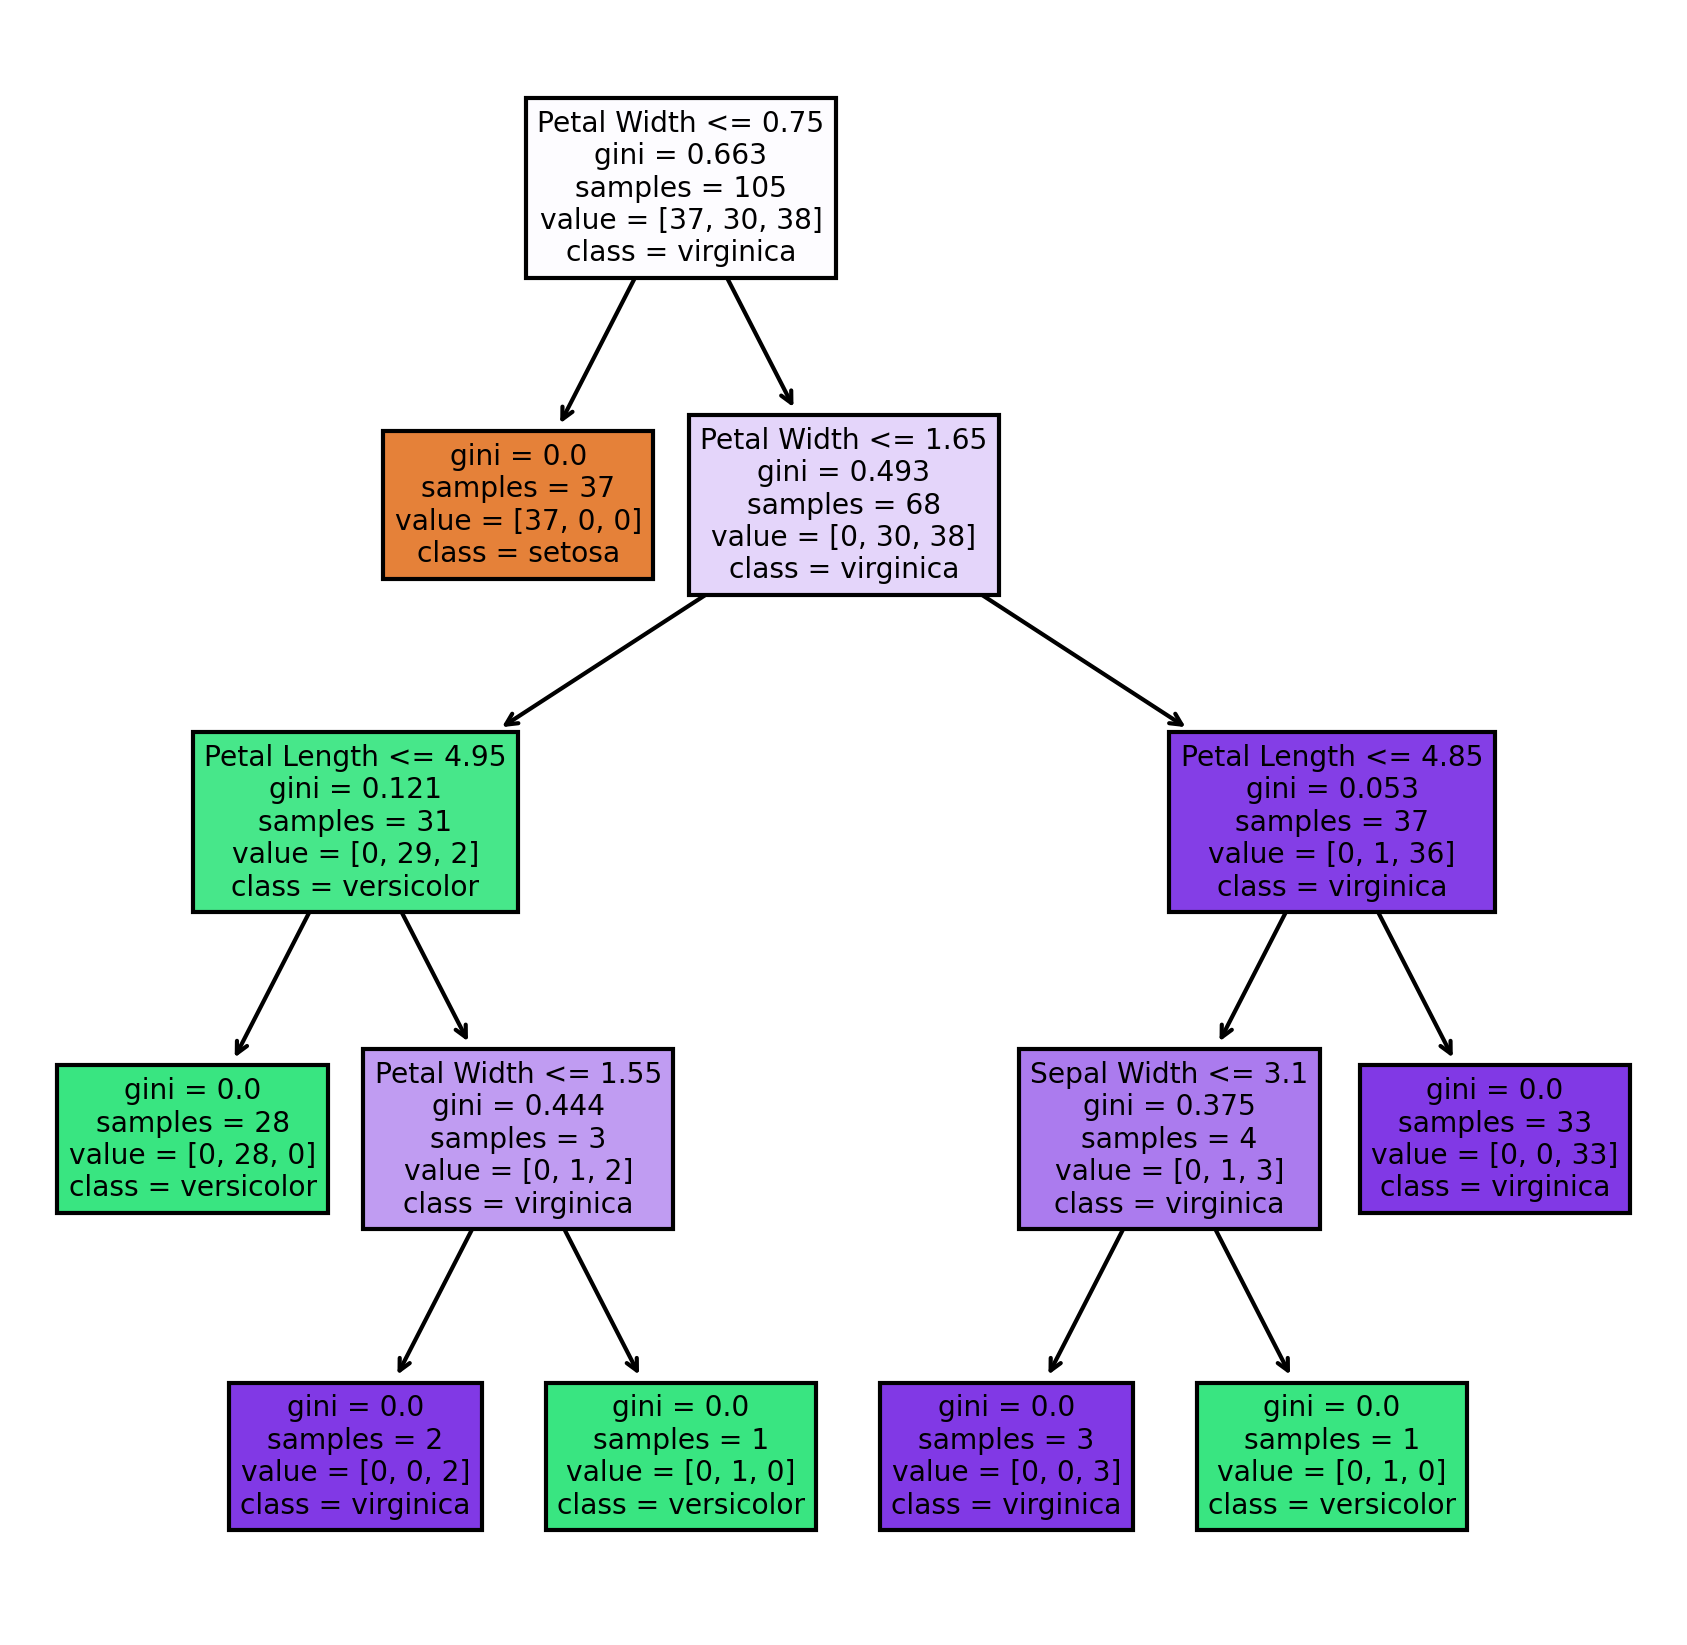

In [36]:
fig, ax =plt.subplots(nrows=1,ncols=1,figsize=(7,7),dpi=300)
tree.plot_tree(dt_classifier,feature_names=feature_names,class_names=class_names,filled=True)
fig.savefig('DecisionTree_Iris.png')

 **CONCLUSION**

 The decision tree has been successfully created and vizualised with an overall accuracy of 100% percentage in the Iris Dataset.
 